#1. IMPORT LIBRARIES

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
import seaborn as sns

#2. DATA LOADING

In [ ]:
# Data Loading

df = pd.read_csv('product_data.csv')
df

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."
...,...,...
495,496,Cap 2 bottoms - Cut loose from the maddening c...
496,497,Cap 2 crew - This crew takes the edge off fick...
497,498,All-time shell - No need to use that morning T...
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...


#3. DATA PREPROCESSING AND DATA CLEANING

In [ ]:
# Let's Check First Data

df['description'][0]

'Active classic boxers - There\'s a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>99 g (3.5 oz)<br><b

###3.1 HYPOTESIS ABOUT CLEAN THE DATA

It looks like that we can split based on a HTML syntax (`<br><br>`).

In [ ]:
# Check Our Hypothesis aboput Split based on `<br><br>`

first_data = df['description'][0]
first_data_split = first_data.split('<br><br>')

print('Contents of first_data_split')
for index, item in enumerate(first_data_split):
  print('Index    : ', index)
  print('Contents : ', item)
  print('')

print('Length of first_data_split   : ', len(first_data_split))

Contents of first_data_split
Index    :  0
Contents :  Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.

Index    :  1
Contents :  <b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul>

Index    :  2
Contents :  <b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recy

Based on above split result, it looks like `Description` can be splitted into 5 columns

1. Name of product.

2. Details of product.

3. Materials of product.

4. Weight.

5. Country of manufacture.

---
Split `Description`

In [ ]:
# Define Empty Lists to Accomodate Split's Results

all_name = []
all_details = []
all_materials = []
all_weight = []
all_country = []

# Split Column `Description`

for index in range (0, len(df)):
  row = df['description'][index]
  row_split = row.split('<br><br>')
  print(index, len(row_split), row_split)

  all_name.append(row_split[0])

  # This variables is get attribute from description
  _details = None
  _materials = None
  _weight = None
  _country = None

  for index_split in range(1, len(row_split)):
    if row_split[index_split].startswith('<b>Details:'):
      _details = row_split[index_split]
    elif row_split[index_split].startswith('<b>Fabric:'):
      _materials = row_split[index_split]
    elif row_split[index_split].startswith('<b>Weight:'):
      _weight = row_split[index_split]
    else:
      _country = row_split[index_split]
  
  if not _details:
    _details = ''
  if not _materials:
    _materials = ''
  if not _weight:
    _weight = ''
  if not _country:
    _country = ''
  
  all_details.append(_details)
  all_materials.append(_materials)
  all_weight.append(_weight)
  all_country.append(_country)
  
  print(len(all_name), len(all_details), len(all_materials), len(all_weight), len(all_country))
  print('')

0 5 ['Active classic boxers - There\'s a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.', '<b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul>', '<b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program', '<b>Weight: </b>99 g (3.5 oz)', 'Made in M

In [ ]:
# Create Function for Cleaning from HTML Tags

def cleaning(data):
  data = str(data).lower()
  data = data.replace('<br><br>',' ') 
  data = data.replace('<b>','')
  data = data.replace('</b>','')
  data = data.replace('<ul>','')
  data = data.replace('<li>','')
  data = data.replace('</li>','')
  data = data.replace('</ul>','')
  data = data.replace('</li>','')
  data = data.replace('"','')
  data = data.replace('-','')
  data = data.replace('.','')
  data = data.replace(',','')
  data = data.replace(':','')
  data = data.replace('(','')
  data = data.replace(')','')
  data = data.replace("'",'')
  data = data.replace('?','')
  data = data.replace('made in','')
  data = data.replace('printed in','')
  data = data.replace('details','')
  data = data.replace('fabric','')
  data = data.replace('weight','')

  data = ' '.join(data.split())
  
  return data

In [ ]:
# Cleaning Each Attribute

all_name = [cleaning(x) for x in all_name]
all_details = [cleaning(x) for x in all_details]
all_materials = [cleaning(x) for x in all_materials]
all_weight = [cleaning(x) for x in all_weight]
all_country = [cleaning(x) for x in all_country]

In [ ]:
print(len(all_name), len(all_details), len(all_materials), len(all_weight), len(all_country))

500 500 500 500 500


In [ ]:
# Create Attributes DataFrame

attributes_df = pd.DataFrame(list(zip(all_name, all_details, all_materials, all_weight, all_country)),
                             columns =['name', 'details', 'materials', 'weight', 'country'])

attributes_df

,name,details,materials,weight,country
0,active classic boxers theres a reason why our ...,silky capilene 1 is ultralight breathable and ...,37oz 100% allrecycled polyester with gladiodor...,99 g 35 oz,mexico
1,active sport boxer briefs skinning up glory re...,stretch mesh provides support openweave mesh f...,46oz 93% polyester 71% recycled/7% spandex wit...,60 g 21 oz,israel
2,active sport briefs these superbreathable nofl...,stretch mesh provides support openweave mesh f...,46oz 93% polyester 71% recycled/7% spandex wit...,49 g 17 oz,israel
3,alpine guide pants skin in climb ice switch to...,durable stretchwoven polyester 47% recycled wi...,76oz 90denier 92% polyester 47% recycled/8% sp...,597 g 207 oz,vietnam
4,alpine wind jkt on high ridges steep ice and a...,light breathable polyester ripstop with deluge...,shell 13oz 20denier 100% polyester ripstop pan...,331 g 115 oz,china
...,...,...,...,...,...
495,cap 2 bottoms cut loose from the maddening cro...,capilene 2 has an open knit that invites airfl...,4oz 100% polyester 54% recycled with gladiodor...,155 g 55 oz,mexico
496,cap 2 crew this crew takes the edge off fickle...,capilene 2 has an open knit that invites airfl...,4oz 100% polyester 54% recycled with gladiodor...,170 g 6 oz,mexico
497,alltime shell no need to use that morning time...,25layer 100% allrecycled polyester shell with ...,shell 25layer 41oz 50denier 100% allrecycled p...,493 g 174 oz,china
498,allwear cargo shorts allwear cargo shorts bask...,light organic cotton canvas zip fly with butto...,52oz 100% organic cotton canvas recyclable thr...,349 g 121 oz,thailand


In [ ]:
# Merge with Existing DataFrame

final_df = pd.concat([df, attributes_df], axis=1)
final_df

,id,description,name,details,materials,weight,country
0,1,Active classic boxers - There's a reason why o...,active classic boxers theres a reason why our ...,silky capilene 1 is ultralight breathable and ...,37oz 100% allrecycled polyester with gladiodor...,99 g 35 oz,mexico
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,stretch mesh provides support openweave mesh f...,46oz 93% polyester 71% recycled/7% spandex wit...,60 g 21 oz,israel
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable nofl...,stretch mesh provides support openweave mesh f...,46oz 93% polyester 71% recycled/7% spandex wit...,49 g 17 oz,israel
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,durable stretchwoven polyester 47% recycled wi...,76oz 90denier 92% polyester 47% recycled/8% sp...,597 g 207 oz,vietnam
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,light breathable polyester ripstop with deluge...,shell 13oz 20denier 100% polyester ripstop pan...,331 g 115 oz,china
...,...,...,...,...,...,...,...
495,496,Cap 2 bottoms - Cut loose from the maddening c...,cap 2 bottoms cut loose from the maddening cro...,capilene 2 has an open knit that invites airfl...,4oz 100% polyester 54% recycled with gladiodor...,155 g 55 oz,mexico
496,497,Cap 2 crew - This crew takes the edge off fick...,cap 2 crew this crew takes the edge off fickle...,capilene 2 has an open knit that invites airfl...,4oz 100% polyester 54% recycled with gladiodor...,170 g 6 oz,mexico
497,498,All-time shell - No need to use that morning T...,alltime shell no need to use that morning time...,25layer 100% allrecycled polyester shell with ...,shell 25layer 41oz 50denier 100% allrecycled p...,493 g 174 oz,china
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...,allwear cargo shorts allwear cargo shorts bask...,light organic cotton canvas zip fly with butto...,52oz 100% organic cotton canvas recyclable thr...,349 g 121 oz,thailand


--- 
**IMPORTANT NOTES**

There are rows that not contain all attributes. Some of them is missing. Such as data in index `395`. In its original `description`, it looks like that there is no information about `weight`.

In [ ]:
# Check Data Index 395

final_df.loc[[395]]

,id,description,name,details,materials,weight,country
395,396,"Wild steelhead, alaska poster - Catch and rele...",wild steelhead alaska poster catch and release...,dimensions 24 x 36 photo by tim pask 2009 pata...,printed with soy inks on 100% recycled paper,,usa


###3.2 DOING SPLIT AGAIN FROM FINAL_DF.DESCRIPTION TO GET PRODUCT NAME

In [ ]:
# Check Our Hypothesis about Split based on `-`

first_data = final_df['description'][100]
first_data_split = first_data.split('-')

print('Contents of first_data_split')
for index, item in enumerate(first_data_split):
  print('Index    : ', index)
  print('Contents : ', item)
  print('')

print('Length of first_data_split   : ', len(first_data_split))

Contents of first_data_split
Index    :  0
Contents :  Pataloha shirt 

Index    :  1
Contents :   Early Hawaiian shirts were pitched as "postcards you can wear." We've been making ours  inspired by native designs true to the aloha spirit  for 20 years. Exquisitely tailored in environmentally friendly 3.3

Index    :  2
Contents :  oz 100% organic cotton coconut cloth, their textured cloth, cools in humid climates. Coconut buttons and chest pocket. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>100% organic cotton coconut

Index    :  3
Contents :  weave fabric</li> <li>Chest pocket</li> <li>Coconut buttons</li></ul><br><br><b>Fabric: </b>3.3

Index    :  4
Contents :  oz 100% organic cotton coconut cloth. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>(222 g 7.7 oz)<br><br>Made in Thailand.

Length of first_data_split   :  5


In [ ]:
# Define Empty Lists to Accomodate Split's Results

all_product = []
all_a = []
all_b = []
all_c = []
all_d = []

# Split Column `Description`

for index in range (0, len(df)):
  row = final_df['description'][index]
  row_split = row.split('-')
  print(index, len(row_split), row_split)

  all_product.append(row_split[0])

  # This variables is get attribute from description
  _a = None
  _b = None
  _c = None
  _d = None

  for index_split in range(1, len(row_split)):
    if row_split[index_split].startswith('Early'):
      _a = row_split[index_split]
    elif row_split[index_split].startswith('oz'):
      _b = row_split[index_split]
    elif row_split[index_split].startswith('weave'):
      _c = row_split[index_split]
    else:
      _d = row_split[index_split]
  
  if not _a:
    _a = ''
  if not _b:
    _b = ''
  if not _c:
    _c = ''
  if not _d:
    _d = ''
  
  all_a.append(_a)
  all_b.append(_b)
  all_c.append(_c)
  all_d.append(_d)
  
  print(len(all_name), len(all_a), len(all_b), len(all_c), len(all_d))
  print('')

0 14 ['Active classic boxers ', " There's a reason why our boxers are a cult favorite ", ' they keep their cool, especially in sticky situations. The quick', 'drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next', 'to', 'skin softness, five', 'panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7', 'oz 100% recycled polyester with moisture', 'wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick', 'to', 'dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5', 'panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul><br><br><b>Fabric: </b>3.7', 'oz 100% all', 'recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Progr

In [ ]:
# Create Function for Cleaning from HTML Tags

def cleaning(data):
  data = str(data).lower()
  data = data.replace('<br><br>',' ') 
  data = data.replace('<b>','')
  data = data.replace('</b>','')
  data = data.replace('<ul>','')
  data = data.replace('<li>','')
  data = data.replace('</li>','')
  data = data.replace('</ul>','')
  data = data.replace('</li>','')
  data = data.replace('"','')
  data = data.replace('-','')
  data = data.replace('.','')
  data = data.replace(',','')
  data = data.replace(':','')
  data = data.replace('(','')
  data = data.replace(')','')
  data = data.replace("'",'')
  data = data.replace('?','')
  data = data.replace('made in','')
  data = data.replace('printed in','')
  data = data.replace('details','')
  data = data.replace('fabric','')
  data = data.replace('weight','')

  data = ' '.join(data.split())
  
  return data

In [ ]:
# Cleaning Each Attribute

all_product = [cleaning(x) for x in all_product]
all_a = [cleaning(x) for x in all_a]
all_b = [cleaning(x) for x in all_b]
all_c = [cleaning(x) for x in all_c]
all_d = [cleaning(x) for x in all_d]

In [ ]:
# Create Attributes DataFrame

attributes_final_df = pd.DataFrame(list(zip(all_product, all_a, all_b, all_c, all_d)),
                             columns =['product', 'a', 'b', 'c', 'd'])

attributes_final_df

,product,a,b,c,d
0,active classic boxers,,oz 100% all,,recycled polyester with gladiodor natural odor...
1,active sport boxer briefs,,oz 93% polyester 71% recycled/7% spandex with ...,weave mesh for airflow wicks efficiently dries...,wicking performance recyclable through the com...
2,active sport briefs,,oz 93% polyester 71% recycled/7% spandex with ...,weave mesh for airflow wicks efficiently and d...,wicking performance recyclable through the com...
3,alpine guide pants,,oz 90,,denier 92% polyester 47% recycled/8% spandex w...
4,alpine wind jkt,,oz 75,,recycled polyester/10% spandex shell and panel...
...,...,...,...,...,...
495,cap 2 bottoms,,oz 100% polyester 54% recycled with gladiodor ...,,skin softness side seams set forward for bette...
496,cap 2 crew,,oz 100% polyester 54% recycled with gladiodor ...,,piecing under the arms and sides is exceptiona...
497,all,,oz 100% polyester 60% recycled brushed fleece ...,,recycled polyester ripstop with a waterproof/b...
498,all,,oz 100% organic cotton canvas recyclable throu...,,entry front pockets welted back pockets hidden...


In [ ]:
# Merge with Existing DataFrame

final_df = pd.concat([final_df, attributes_final_df], axis=1)
final_df

,id,description,name,details,materials,weight,country,product,a,b,c,d
0,1,Active classic boxers - There's a reason why o...,active classic boxers theres a reason why our ...,silky capilene 1 is ultralight breathable and ...,37oz 100% allrecycled polyester with gladiodor...,99 g 35 oz,mexico,active classic boxers,,oz 100% all,,recycled polyester with gladiodor natural odor...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,stretch mesh provides support openweave mesh f...,46oz 93% polyester 71% recycled/7% spandex wit...,60 g 21 oz,israel,active sport boxer briefs,,oz 93% polyester 71% recycled/7% spandex with ...,weave mesh for airflow wicks efficiently dries...,wicking performance recyclable through the com...
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable nofl...,stretch mesh provides support openweave mesh f...,46oz 93% polyester 71% recycled/7% spandex wit...,49 g 17 oz,israel,active sport briefs,,oz 93% polyester 71% recycled/7% spandex with ...,weave mesh for airflow wicks efficiently and d...,wicking performance recyclable through the com...
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,durable stretchwoven polyester 47% recycled wi...,76oz 90denier 92% polyester 47% recycled/8% sp...,597 g 207 oz,vietnam,alpine guide pants,,oz 90,,denier 92% polyester 47% recycled/8% spandex w...
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,light breathable polyester ripstop with deluge...,shell 13oz 20denier 100% polyester ripstop pan...,331 g 115 oz,china,alpine wind jkt,,oz 75,,recycled polyester/10% spandex shell and panel...
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Cap 2 bottoms - Cut loose from the maddening c...,cap 2 bottoms cut loose from the maddening cro...,capilene 2 has an open knit that invites airfl...,4oz 100% polyester 54% recycled with gladiodor...,155 g 55 oz,mexico,cap 2 bottoms,,oz 100% polyester 54% recycled with gladiodor ...,,skin softness side seams set forward for bette...
496,497,Cap 2 crew - This crew takes the edge off fick...,cap 2 crew this crew takes the edge off fickle...,capilene 2 has an open knit that invites airfl...,4oz 100% polyester 54% recycled with gladiodor...,170 g 6 oz,mexico,cap 2 crew,,oz 100% polyester 54% recycled with gladiodor ...,,piecing under the arms and sides is exceptiona...
497,498,All-time shell - No need to use that morning T...,alltime shell no need to use that morning time...,25layer 100% allrecycled polyester shell with ...,shell 25layer 41oz 50denier 100% allrecycled p...,493 g 174 oz,china,all,,oz 100% polyester 60% recycled brushed fleece ...,,recycled polyester ripstop with a waterproof/b...
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...,allwear cargo shorts allwear cargo shorts bask...,light organic cotton canvas zip fly with butto...,52oz 100% organic cotton canvas recyclable thr...,349 g 121 oz,thailand,all,,oz 100% organic cotton canvas recyclable throu...,,entry front pockets welted back pockets hidden...


In [ ]:
df = final_df.copy()

In [ ]:
df.drop(columns=['id', 'description', 'name', 'a', 'b', 'c', 'd'], axis=1,inplace=True)
df.head()

,details,materials,weight,country,product
0,silky capilene 1 is ultralight breathable and ...,37oz 100% allrecycled polyester with gladiodor...,99 g 35 oz,mexico,active classic boxers
1,stretch mesh provides support openweave mesh f...,46oz 93% polyester 71% recycled/7% spandex wit...,60 g 21 oz,israel,active sport boxer briefs
2,stretch mesh provides support openweave mesh f...,46oz 93% polyester 71% recycled/7% spandex wit...,49 g 17 oz,israel,active sport briefs
3,durable stretchwoven polyester 47% recycled wi...,76oz 90denier 92% polyester 47% recycled/8% sp...,597 g 207 oz,vietnam,alpine guide pants
4,light breathable polyester ripstop with deluge...,shell 13oz 20denier 100% polyester ripstop pan...,331 g 115 oz,china,alpine wind jkt


In [ ]:
import itertools
list_country = [x.split(', ') for x in df.dropna(subset=['country'])['country'].tolist()]
list_country = list(itertools.chain(*list_country))

from collections import Counter
df_country_count = pd.DataFrame(Counter(list_country).most_common()[:10], columns=['country', 'Count'])

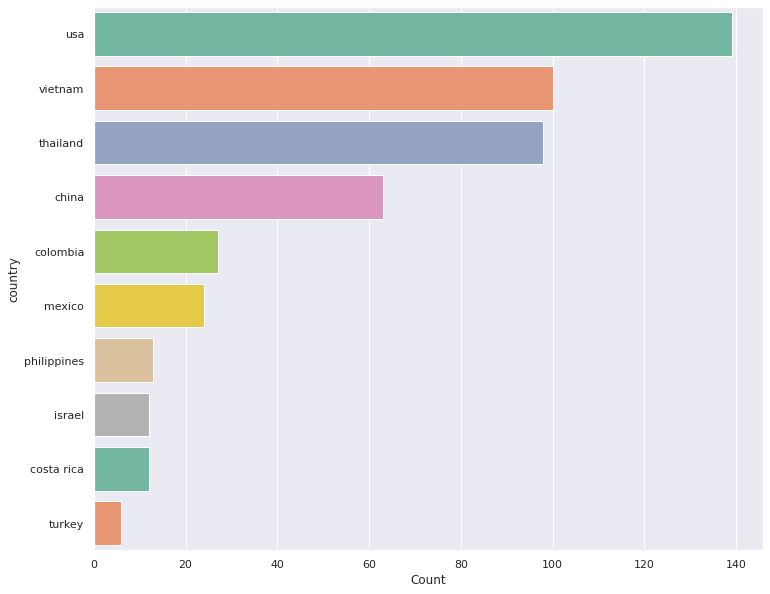

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.barplot(y="country", x='Count', data=df_country_count, palette="Set2", orient='h')

#4. FINAL DATA

In [ ]:
df["combined"] = df['details'] + '  ' + df['materials'] + ' ' + df['weight'] + ' ' + df['country'] 
df.drop(["details","materials","weight","country"],axis=1,inplace=True)
df.head()

,product,combined
0,active classic boxers,silky capilene 1 is ultralight breathable and ...
1,active sport boxer briefs,stretch mesh provides support openweave mesh f...
2,active sport briefs,stretch mesh provides support openweave mesh f...
3,alpine guide pants,durable stretchwoven polyester 47% recycled wi...
4,alpine wind jkt,light breathable polyester ripstop with deluge...


#5. PRODUCT RECOMMENDER BASED ON SIMILARITY WITH COSINE SIMILARITY

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Capture similarity 
from sklearn.metrics.pairwise import linear_kernel

# Content Similarity
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(df["combined"])
cosine_similarities = linear_kernel(matrix,matrix)
product_name = df['product']
indices = pd.Series(df.index, index=df['product'])

In [ ]:
def product_recommender(product):
    idx = indices[product]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    product_indices = [i[0] for i in sim_scores]
    return product_name.iloc[product_indices]

In [ ]:
product_recommender('active sport briefs').head(10)

1      active sport boxer briefs
298            active boy shorts
299                active briefs
494                active briefs
155              active mesh bra
300          active classic cami
291                  hotline top
164                barely bikini
411               sunshade shirt
104                     r1 hoody
Name: product, dtype: object